In [273]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt

In [274]:
def normalize(arr):
    mean = arr.mean()
    # print(mean) 
    # variance = acid_arr.var() 
    std_dev = arr.std()  
    arr = (arr - mean)/std_dev  
    return arr

In [275]:
def sigmoid(x):
    z = np.exp(-x) 
    return (1 / (1 + z)) 

# a = np.array([1,2,3])
# print(sigmoid(a))

In [276]:
test_input = pd.read_csv("./ass1_data/data/q3/logisticX.csv") 
test_output = pd.read_csv("./ass1_data/data/q3/logisticY.csv") 

Y = test_output["y"].to_numpy() 

x1 = test_input["x1"].to_numpy() 
x1 = normalize(x1) 

x2 = test_input["x2"].to_numpy() 
x2 = normalize(x2)

X = np.zeros((Y.size, 3)) 
X[:, 0] = 1 
X[:, 1] = x1  
X[:, 2] = x2  

In [277]:
def compute_gradient(theta , X, Y) : 
    z = sigmoid(np.matmul(X, theta)) 
    Z = Y - z   
    # print(Y)
    gradient = np.zeros(theta.size)
    for j in range(theta.size):
        X_j = X[:, j] 
        gradient[j] = np.sum(Z * X_j)  
    # gradient = np.sum( Z * X , axis = 0)
    # print(gradient)  
    return gradient 

# theta = np.zeros((3,)) 
# print(compute_gradient(theta, X, Y))

In [278]:
def compute_hessian(theta, X, Y):
    n = theta.size 
    hessian = np.zeros((n , n ))
    for i in range(n):
        for j in range(n):
            z = sigmoid(np.matmul(X, theta)) 
            comp1 = -X[:,i] * X[:, j] * z * (1 - z) 
            comp2 = 0 if  (i != j) else (Y - z) 
            hessian[i, j] = np.sum(comp1 + comp2)  
    
    return hessian 

In [279]:
def compute_log_likelihood(theta, X, Y):
    z = sigmoid(np.matmul(X, theta)) 
    
    log1 = np.log(z) 
    # print(1 - z) 
    log2 = np.log(1 - z) 
    error_vector = Y * log1 + (1 - Y) * log2 
    return np.sum(error_vector) 

In [280]:
def per_change(ll1, ll2):
    diff = ll2 - ll1
    return abs(diff/ ll1) 

In [281]:
def newton_raphson(X, Y):
    n = X[0].size 
    theta = np.zeros(n) 
    learning_parameter = 1

    ll_curr , ll_prev = 0,0 
    count = 0
    while (True):
        print(f"theta is {theta}") 
        ll_prev = ll_curr 
        ll_curr = compute_log_likelihood(theta, X, Y) 
        print(f"log likelihood is {ll_curr}") 

        gradient = compute_gradient(theta, X, Y) 
        hessian = compute_hessian(theta, X, Y) 
        # print(f"grad and hessian are {gradient} \n {hessian}") 
        # prev_theta = theta 
        theta = theta - learning_parameter * np.matmul(np.linalg.inv(hessian), gradient) 
        count += 1
        if (ll_prev != 0 and per_change(ll_prev, ll_curr) < 0.01): break 


    print(f"learned theta is {theta}")
    ll = compute_log_likelihood(theta, X, Y) 
    print(f"log likelihood is {ll}") 
    print(f"no of iterations is {count}") 

    return theta 



In [282]:
theta = newton_raphson(X, Y)
#  -2.89810623, -21.28638967,  21.56474613 

theta is [0. 0. 0.]
log likelihood is -69.31471805599453
theta is [ 1.63523661e-16  8.97341408e-01 -9.20112283e-01]
log likelihood is -33.42765918144596
theta is [ 0.09805591  1.57786479 -1.60445389]
log likelihood is -25.50872932954965
theta is [ 0.25241185  2.17911519 -2.2731    ]
log likelihood is -23.1629826490038
theta is [ 0.37832836  2.53467013 -2.67085306]
log likelihood is -22.838781316969413
theta is [ 0.40121266  2.58863125 -2.72580413]
log likelihood is -22.83414505374106
learned theta is [ 0.40125315  2.58854764 -2.7255884 ]
log likelihood is -22.8341449844724
no of iterations is 6


In [285]:
def plot_line(theta, legend):
    x_coords = np.arange(-3,3, 0.5) 
    # print(x_coords)
    print(theta)
    y_coords = (-theta[0] - theta[1] * x_coords )/ theta[2] 
    plt.plot(x_coords, y_coords, label = legend, color = "green")

[ 0.40125315  2.58854764 -2.7255884 ]


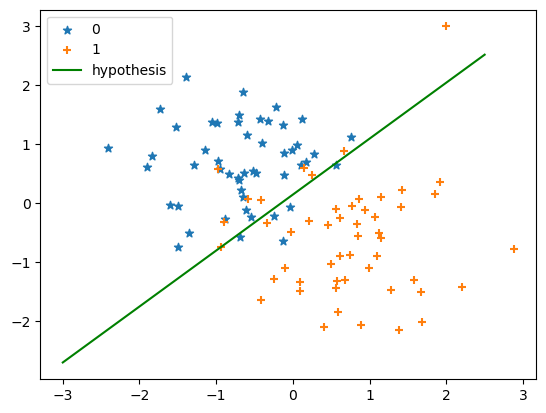

In [286]:
class1 = np.array([[1,2,3]]) 
class2 = np.array([[1,2,3]]) 

for i in range(Y.size):
    if (Y[i] == 0): class1 = np.append(class1, [X[i]], 0) 
    else: class2 = np.append(class2, [X[i]], 0) 

x = class1[1:, 1] 
y = class1[1:, 2] 

plt.scatter(x, y, marker = "*", label = "0")

x = class2[:, 1] 
y = class2[:, 2] 
plt.scatter(x, y, marker = "+", label = "1")

plot_line(theta, "hypothesis") 

plt.legend() 


plt.show() 
